In [0]:
!pip install -q keras

In [0]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
#2. Get the files
feature_downloaded = drive.CreateFile({'id':'1F4Xf1CZkwVyMsX3FjfH9WkGe5-p_uRw6'})
feature_downloaded.GetContentFile('full_local_data.mat')


W0625 16:58:02.629417 140708618037120 __init__.py:44] file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth
Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/__init__.py", line 41, in autodetect
    from . import file_cache
  File "/usr/local/lib/python2.7/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 41, in <module>
    'file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth')
ImportError: file_cache is unavailable when using oauth2client >= 4.0.0 or google-auth


In [0]:
import tensorflow as tf
import scipy.io as sc
import numpy as np
import random
from google.colab import files
from scipy.fftpack import rfft
import time
from sklearn import preprocessing

# this function is used to transfer one column label to one hot label
def one_hot(y_):
    # Function to encode output labels from number indexes
    # e.g.: [[5], [0], [3]] --> [[0, 0, 0, 0, 0, 1], [1, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0]]
    print("one hot")
    print(y_.shape)
    y_ = y_.reshape(len(y_))
    n_values = np.max(y_) + 1
    return np.eye(n_values)[np.array(y_, dtype=np.int32)]




#  Data loading
feature = sc.loadmat("full_local_data.mat")

all = feature['Eddeny3a2lk']
print('Feature')
print(feature)

print('shape')
print (all.shape)
print('shape')
print (all.shape)
np.random.shuffle(all)   # mix eeg_all
# Get the 28000 samples of that subject
final=len(all)
print(final)
all=all[0:final]
temp = all[final-1]
temp = np.reshape(temp, (1,15))
print(temp.shape)
all = np.append(all, temp, axis=0)


# Get the features
feature_all =all[:,0:14]


# Get the label
labels=all[:,14]

# z-score

print("Feature All")
print(feature_all)
# transposed = [list(i) for i in zip(*feature_all)] ## Transpose so each sub-array is the data of a channel in time domain
# fft_transposed = [rfft(np.array(i)) for i in transposed] ## Compute FFT (real values)
# fft_samples = [list(np.round(i, 0)) for i in zip(*fft_transposed)] ## Transpose again so each channel is in a column instead of a row, rounds to the nearest unit while transposing
# feature_all = fft_samples[0:]

# feature_all = np.asarray(feature_all)
no_fea=feature_all.shape[-1]
labels = labels.astype(int)

print("labels")
print(labels)
labels_all=one_hot(labels)
print("")
print (labels_all)


Feature
{'__version__': '1.0', 'Eddeny3a2lk': array([[4.67912121e+03, 4.32109091e+03, 4.60236364e+03, ...,
        4.34324242e+03, 4.59206061e+03, 0.00000000e+00],
       [4.68169697e+03, 4.32006061e+03, 4.60030303e+03, ...,
        4.33190909e+03, 4.58845454e+03, 0.00000000e+00],
       [4.69457576e+03, 4.33242424e+03, 4.61318182e+03, ...,
        4.35509091e+03, 4.60184848e+03, 0.00000000e+00],
       ...,
       [4.62090909e+03, 4.30769697e+03, 4.66727273e+03, ...,
        4.38496970e+03, 4.46842424e+03, 4.00000000e+00],
       [4.60442424e+03, 4.30821212e+03, 4.65593939e+03, ...,
        4.38393939e+03, 4.44884848e+03, 4.00000000e+00],
       [4.61163636e+03, 4.30512121e+03, 4.65593939e+03, ...,
        4.38445455e+03, 4.45039394e+03, 4.00000000e+00]]), '__header__': 'MATLAB 5.0 MAT-file Platform: nt, Created on: Tue Jun 25 15:34:06 2019', '__globals__': []}
shape
(43831, 15)
shape
(43831, 15)
43831
(1, 15)
Feature All
[[4470.48484804 4327.78787836 4654.39393893 ... 4733.21212074
 

In [0]:
 # Define window length (4 seconds)
win = 0.5 * sf
freqs, psd = signal.welch(data, sf, nperseg=win)
print('freqs')
print(freqs)
print('psd')
print(psd)



freqs
[ 0.          9.14285714 18.28571429 27.42857143 36.57142857 45.71428571
 54.85714286 64.        ]
psd
[[9.12513522e-03 1.99992810e-02 5.27022739e-03 ... 5.01860510e-04
  4.02842864e-03 1.97606150e-03]
 [2.39622300e-04 1.32385661e-05 6.73881098e-04 ... 3.64627142e-03
  1.97857131e-03 5.16269424e-04]
 [1.05667611e-02 5.34455888e-02 2.19093856e-03 ... 5.25860030e-02
  1.32842827e-02 3.92147907e-05]
 ...
 [1.81302827e-02 5.21844021e-02 3.64639227e-02 ... 2.03589145e-03
  8.17413974e-05 4.23339524e-05]
 [2.65331346e-03 9.11223962e-03 9.48863088e-03 ... 5.98760032e-03
  6.68353114e-03 4.35648301e-03]
 [2.65331346e-03 9.11223962e-03 9.48863088e-03 ... 5.98760032e-03
  6.68353114e-03 4.35648301e-03]]


/usr/local/lib/python2.7/dist-packages/scipy/signal/spectral.py:1970: UserWarning: nperseg = 64 is greater than input length  = 14, using nperseg = 14
  .format(nperseg, input_length))


before
[[4470.48484804 4327.78787836 4654.39393893 ... 4733.21212074
  4334.99999957 4359.21212078]
 [4492.63636319 4371.06060562 4631.21212075 ... 4623.99999954
  4325.72727229 4173.75757534]
 [4415.36363592 4495.72727228 4703.33333286 ... 4719.30302983
  4356.12121169 4469.45454501]
 ...
 [4623.99999954 4266.48484806 4675.51515105 ... 4526.12121167
  4150.06060565 4500.36363591]
 [4629.6666662  4331.39393896 4621.42424196 ... 4629.15151469
  4301.51515109 4501.90909046]
 [4629.6666662  4331.39393896 4621.42424196 ... 4629.15151469
  4301.51515109 4501.90909046]]
after
[[-1.10264226 -0.62693888  0.2734524  ...  1.86255717  0.04111842
  -0.24860759]
 [-0.93977829 -0.1242802  -0.10953284 ...  0.0652846  -0.04582777
  -0.92870626]
 [-1.50790841  1.32385551  1.0819768  ...  1.63365925  0.23916253
   0.15567329]
 ...
 [ 0.02604293 -1.33903867  0.62239451 ... -1.54547855 -1.69297508
   0.26902307]
 [ 0.0677058  -0.58505065 -0.27123772 ...  0.15006161 -0.27285394
   0.27469056]
 [ 0.0677058 

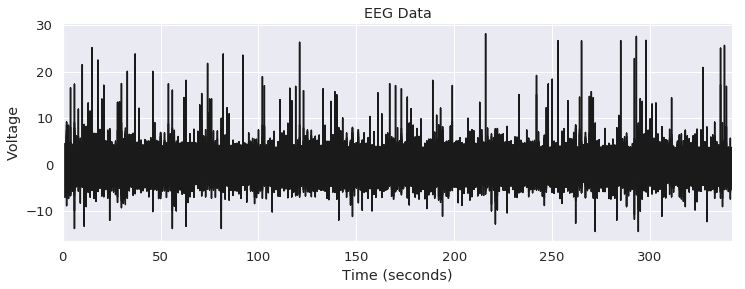

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import signal

from scipy.fftpack import rfft
import numpy as np

sns.set(font_scale=1.2)
print("before")
print(feature_all)
feature_all = preprocessing.scale(feature_all)
print("after")

print(feature_all)

data = feature_all

# Define sampling frequency and time vector
sf = 128
time = np.arange(data.shape[0]) / sf
print('data')
print(data.shape)
print('time')
print(time.shape)
# Plot the signal
fig, ax = plt.subplots(1, 1, figsize=(12, 4))
plt.plot(time, data, lw=1.5, color='k')
plt.xlabel('Time (seconds)')
plt.ylabel('Voltage')
plt.xlim([time.min(), time.max()])
plt.title('EEG Data')
sns.despine()

In [0]:
n_classes=5
###CNN code,
feature_all=feature_all# the input data of CNN
print ("cnn input feature shape", feature_all.shape)
n_fea=feature_all.shape[-1]
print(n_fea)
# labels_all=one_hot(labels_all)

final=all.shape[0]
middle_number=final*3/4
print("-----",middle_number)
feature_training =feature_all[0:middle_number]
feature_testing =feature_all[middle_number:final]
label_training =labels_all[0:middle_number]
label_testing =labels_all[middle_number:final]
label_ww=labels_all[middle_number:final]  # for the confusion matrix
print ("label_testing",label_testing.shape)
a=feature_training
b=feature_testing
print(feature_training.shape)
print(feature_testing.shape)

print("Input shape")
print(b.shape)
print("Label shape")
print(label_testing.shape)

keep=1
batch_size=final-middle_number
n_group=3
train_fea=[]
for i in range(n_group):
    f =a[(0+batch_size*i):(batch_size+batch_size*i)]
    train_fea.append(f)
print("Here")
print (train_fea[0].shape)

train_label=[]
for i in range(n_group):
    f =label_training[(0+batch_size*i):(batch_size+batch_size*i), :]
    train_label.append(f)
print (train_label[0].shape)

# the CNN code
def compute_accuracy(v_xs, v_ys):
    global prediction
    y_pre = sess3.run(prediction, feed_dict={xs: v_xs, keep_prob: keep})
    correct_prediction = tf.equal(tf.argmax(y_pre,1), tf.argmax(v_ys,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    result = sess3.run(accuracy, feed_dict={xs: v_xs, ys: v_ys, keep_prob: keep})
    return result

#to creat a random weights 
def weight_variable(shape):
    # Outputs random values from a truncated normal distribution
    initial = tf.truncated_normal(shape, stddev=0.1)
    # A variable maintains state in the graph across calls to run(). 
    # You add a variable to the graph by constructing an instance of the class Variable.
    print('shape')
    print(shape)
    return tf.Variable(initial)

#random bias values
def bias_variable(shape):
    # Creates a constant tensor
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

def conv2d(x, W):
    # stride [1, x_movement, y_movement, 1]
    # Must have strides[0] = strides[3] = 1
    # the concolution layer x is the input
    # w is the weight and the stride is how many moves it makes in each dimention ie how many pixels
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# def max_pool_2x2(x):
#     # stride [1, x_movement, y_movement, 1]
#     return tf.nn.max_pool(x, ksize=[1,1,2,1], strides=[1,1,2,1], padding='SAME')
#max pooling to reduce dimentionality .. here consider every 1*2 window
def max_pool_1x2(x):
    # stride [1, x_movement, y_movement, 1]
    return tf.nn.max_pool(x, ksize=[1,1,2,1], strides=[1,1,2,1], padding='SAME')

# define placeholder for inputs to network
xs = tf.placeholder(tf.float32, [None, n_fea]) # 1*14
ys = tf.placeholder(tf.float32, [None, n_classes])  # 2 is the classes of the data
# Lookup what is keep_prob
keep_prob = tf.placeholder(tf.float32)
x_image = tf.reshape(xs, [-1, 1, n_fea, 1])
print('xs')
print(xs)
print(xs.shape)
print('x_image')
print(x_image)
print(x_image.shape)  

## conv1 layer ##
W_conv1 = weight_variable([1,1, 1,20]) # patch 1*1, in size is 1, out size is 2
b_conv1 = bias_variable([20])
h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1) # output size 1*64*2
h_pool1 = max_pool_1x2(h_conv1)                          # output size 1*32x2

## conv2 layer ##
# W_conv2 = weight_variable([1,1, 2, 4]) # patch 1*1, in size 2, out size 4
# b_conv2 = bias_variable([4])
# h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2) # output size 1*32*4
# h_pool2 = max_pool_1x2(h_conv2)                          # output size 1*16*4

## fc1 layer ## fc fully connected layer
W_fc1 = weight_variable([1*(n_fea/2)*20, 120])
b_fc1 = bias_variable([120])
# [n_samples, 7, 7, 64] ->> [n_samples, 7*7*64]
h_pool2_flat = tf.reshape(h_pool1, [-1, 1*(n_fea/2)*20])
h_fc1 = tf.nn.sigmoid(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

## fc2 layer ##
W_fc2 = weight_variable([120, n_classes])
b_fc2 = bias_variable([n_classes])
# Multiplies matrix a by matrix b, producing a * b
prediction = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

# Weight regulrization
l2 = 0.001 * sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())
# Getting the mean of the errors between the predication results and the class labels in the trainning data
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=ys))+l2   # Softmax loss
# Using optimizer
train_step = tf.train.AdamOptimizer(0.04).minimize(cross_entropy)
# Begin session to visit the nodes (tensors) of the graph
sess3 = tf.Session()
# Initializae all the defined variables
init = tf.global_variables_initializer()
# Visit the nodes of those variables
sess3.run(init)
# Total number of array elements which trigger summarization rather than full array
#np.set_printoptions(threshold=np.nan)
step = 1
while step < 1500:
    # Train the model
    for i in range(n_group):
        sess3.run(train_step, feed_dict={xs: train_fea[i], ys: train_label[i], keep_prob:keep})
    # After 5 steps, use the model on the test data
    if step % 5 == 0:
        # Compute the cost using the cross entropy
        cost=sess3.run(cross_entropy, feed_dict={xs: b, ys: label_testing, keep_prob: keep})
        # Compute the accuracy
        acc_cnn_t=compute_accuracy(b, label_testing)
        print('the step is:',step,',the acc is',acc_cnn_t,', the cost is', cost)
    step+=1
acc_cnn=compute_accuracy(b, label_testing)
feature_all_cnn=sess3.run(h_fc1_drop, feed_dict={xs: feature_all, keep_prob: keep})
print ("the shape of cnn output features",feature_all.shape,labels_all.shape)



('cnn input feature shape', (43832, 14))
14
('-----', 32874)
('label_testing', (10958, 5))
(32874, 14)
(10958, 14)
Input shape
(10958, 14)
Label shape
(10958, 5)
Here
(10958, 14)
(10958, 5)
xs
Tensor("Placeholder_3:0", shape=(?, 14), dtype=float32)
(?, 14)
x_image
Tensor("Reshape_2:0", shape=(?, 1, 14, 1), dtype=float32)
(?, 1, 14, 1)
shape
[1, 1, 1, 20]
shape
[140, 120]
shape
[120, 5]
('the step is:', 5, ',the acc is', 0.30854172, ', the cost is', 194.5906)
('the step is:', 10, ',the acc is', 0.37059683, ', the cost is', 66.84056)
('the step is:', 15, ',the acc is', 0.43329075, ', the cost is', 23.427603)
('the step is:', 20, ',the acc is', 0.4589341, ', the cost is', 8.870596)
('the step is:', 25, ',the acc is', 0.51186347, ', the cost is', 3.8979497)
('the step is:', 30, ',the acc is', 0.54398614, ', the cost is', 2.1696463)
('the step is:', 35, ',the acc is', 0.5748312, ', the cost is', 1.5645065)
('the step is:', 40, ',the acc is', 0.6282168, ', the cost is', 1.2448361)
('the step

In [0]:
#######RNN
tf.reset_default_graph()

feature_all=feature_all
no_fea=feature_all.shape[-1]
print (no_fea)
# The input to each LSTM layer must be a 3D
# feature_all.reshape(samples-batch size-,time step, features)

feature_all =feature_all.reshape([final,1,no_fea])
#argmax returns the index with the largest value across axis of a tensor
print (tf.argmax(labels_all,1))

print("labels shape")
print (labels_all.shape)
print("features shape")
print(feature_all.shape)

# middle_number=21000
feature_training =feature_all[0:middle_number]
feature_testing =feature_all[middle_number:final]
label_training =labels_all[0:middle_number]
label_testing =labels_all[middle_number:final]
# print "label_testing",label_testing
a=feature_training
b=feature_testing
print(feature_training.shape)
print(feature_testing.shape)
#264 dimention vector, that is passed to the next layer 
nodes=264
#Used for Weight regulrization 
lameda=0.004
#learning rate
lr=0.005

batch_size=final-middle_number
train_fea=[]
n_group=3
for i in range(n_group):
    f =a[(0+batch_size*i):(batch_size+batch_size*i)]
    train_fea.append(f)
  
print("here")
print (train_fea[0].shape)

train_label=[]
for i in range(n_group):
    f =label_training[(0+batch_size*i):(batch_size+batch_size*i), :]
    train_label.append(f)
print (train_label[0].shape)


# hyperparameters

n_inputs = no_fea
n_steps = 1 # time steps
n_hidden1_units = nodes   # neurons in hidden layer
n_hidden2_units = nodes
n_hidden3_units = nodes
n_hidden4_units=nodes
n_classes = n_classes

# tf Graph input

x = tf.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.placeholder(tf.float32, [None, n_classes])

# Define weights
#tf.random_normal: Outputs random values from a normal distribution
weights = {

'in': tf.Variable(tf.random_normal([n_inputs, n_hidden1_units]), trainable=True),
'a': tf.Variable(tf.random_normal([n_hidden1_units, n_hidden1_units]), trainable=True),

'hidd2': tf.Variable(tf.random_normal([n_hidden1_units, n_hidden2_units])),
'hidd3': tf.Variable(tf.random_normal([n_hidden2_units, n_hidden3_units])),
'hidd4': tf.Variable(tf.random_normal([n_hidden3_units, n_hidden4_units])),

'out': tf.Variable(tf.random_normal([n_hidden4_units, n_classes]), trainable=True),
}

biases = {
#tf.constant result a 1-D tensor of value 0.1
'in': tf.Variable(tf.constant(0.1, shape=[n_hidden1_units])),

'hidd2': tf.Variable(tf.constant(0.1, shape=[n_hidden2_units ])),
'hidd3': tf.Variable(tf.constant(0.1, shape=[n_hidden3_units])),
'hidd4': tf.Variable(tf.constant(0.1, shape=[n_hidden4_units])),

'out': tf.Variable(tf.constant(0.1, shape=[n_classes ]), trainable=True)
}


def RNN(X, weights, biases):
    # hidden layer for input to cell
    ########################################

    # transpose the inputs shape from
    X = tf.reshape(X, [-1, n_inputs])

    # into hidden
    #there are n input and output we take only the last output to feed to the next layer
    X_hidd1 = tf.matmul(X, weights['in']) + biases['in']
    X_hidd2 = tf.matmul(X_hidd1, weights['hidd2']) + biases['hidd2']
    X_hidd3 = tf.matmul(X_hidd2, weights['hidd3']) + biases['hidd3']
    X_hidd4 = tf.matmul(X_hidd3, weights['hidd4']) + biases['hidd4']
    X_in = tf.reshape(X_hidd4, [-1, n_steps, n_hidden4_units])


    # cell
    ##########################################

    # basic LSTM Cell.
    # 1-layer LSTM with n_hidden units.
    # creates a LSTM layer and instantiates variables for all gates.
    lstm_cell_1 = tf.contrib.rnn.BasicLSTMCell(n_hidden4_units, forget_bias=1.0, state_is_tuple=True)
    # 2nd layer LSTM with n_hidden units.
    lstm_cell_2 = tf.contrib.rnn.BasicLSTMCell(n_hidden4_units, forget_bias=1.0, state_is_tuple=True)
    # Adding an additional layer to inprove the accuracy
    # RNN cell composed sequentially of multiple simple cells.

    lstm_cell = tf.contrib.rnn.MultiRNNCell([lstm_cell_1, lstm_cell_2], state_is_tuple=True)
    # lstm cell is divided into two parts (c_state, h_state)
    #Initializing the zero state
    init_state = lstm_cell.zero_state(batch_size, dtype=tf.float32)

    with tf.variable_scope('lstm1'):
        # 'state' is a tensor of shape [batch_size, cell_state_size]
        outputs, final_state = tf.nn.dynamic_rnn(lstm_cell, X_in, initial_state=init_state, time_major=False)

    # hidden layer for output as the final results
    #############################################
    print("before")
    print(outputs)
    outputs = tf.unstack(tf.transpose(outputs, [1, 0, 2]))    # states is the last outputs
    print("after")
    print(outputs)
    #there are n input and n output we take only the last output to feed to the next layer
    results = tf.matmul(outputs[-1], weights['out']) + biases['out']

    return results, outputs[-1]

#################################################################################################################################################

pred,Feature = RNN(x, weights, biases)
lamena =lameda
l2 = lamena * sum(tf.nn.l2_loss(tf_var) for tf_var in tf.trainable_variables())  # L2 loss prevents this overkill neural network to overfit the data
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred, labels=y)) + l2  # Softmax loss
train_op = tf.train.AdamOptimizer(lr).minimize(cost)
    # train_op = tf.train.AdagradOptimizer(l).minimize(cost)
    # train_op = tf.train.RMSPropOptimizer(0.00001).minimize(cost)
    # train_op = tf.train.AdagradDAOptimizer(0.01).minimize(cost)
    # train_op = tf.train.GradientDescentOptimizer(0.00001).minimize(cost)
# pred_result =tf.argmax(pred, 1)
label_true =tf.argmax(y, 1)
correct_pred = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))
confusion_m=tf.confusion_matrix(tf.argmax(y, 1), tf.argmax(pred, 1))
#starting sessions

  
with tf.Session() as sess:
    if int((tf.__version__).split('.')[1]) < 12 and int((tf.__version__).split('.')[0]) < 1:
        init = tf.initialize_all_variables()
    else:
        init = tf.global_variables_initializer()
    sess.run(init)
    saver = tf.train.Saver()
    step = 0
    
    
  
    #downloaded = drive.CreateFile({'id':'10p_NuiBV2Or2sk6cm0yPLfu9tJ2lXEKg'})
    #f2 = downloaded.GetContentString()  
      
    #filename = "/home/xiangzhang/scratch/results/rnn_acc.csv"
    #f2 = open(filename, 'wb')
    while step < 350:
        for i in range(n_group):
            sess.run(train_op, feed_dict={
                x: train_fea[i],
                y: train_label[i],
            })
        if sess.run(accuracy, feed_dict={x: b,y: label_testing,})>0.96:
            print(
            "The lamda is :", lamena, ", Learning rate:", lr, ", The step is:", step, ", The accuracy is: ",
            sess.run(accuracy, feed_dict={
                x: b,
                y: label_testing,
            }))

            break
        if step % 5 == 0:
            hh=sess.run(accuracy, feed_dict={
                x: b,
                y: label_testing,
            })
            #f2.write(str(hh)+'\n')
            print(", The step is:",step,", The accuracy is:", hh, "The cost is :",sess.run(cost, feed_dict={
                x: b,
                y: label_testing,
            }))
        step += 1

    ##confusion matrix
    feature_0=sess.run(Feature, feed_dict={x: train_fea[0]})
    for i in range(1,n_group):
        feature_11=sess.run(Feature, feed_dict={x: train_fea[i]})
        feature_0=np.vstack((feature_0,feature_11))

    print (feature_0.shape)
    feature_all_rnn=np.vstack((feature_0,feature_b))

    confusion_m=sess.run(confusion_m, feed_dict={
                x: b,
                y: label_testing,
            })
    print (confusion_m)
    ## predict probility
    # pred_prob=sess.run(pred, feed_dict={
    #             x: b,
    #             y: label_testing,
    #         })
    # # print pred_prob


    #print ("RNN train time:", time4 - time3, "Rnn test time", time5 - time4, 'RNN total time', time5 - time3)





14
Tensor("ArgMax:0", shape=(43832,), dtype=int64)
labels shape
(43832, 5)
features shape
(43832, 1, 14)
(32874, 1, 14)
(10958, 1, 14)
here
(10958, 1, 14)
(10958, 5)
before
Tensor("lstm1/rnn/transpose_1:0", shape=(10958, 1, 264), dtype=float32)
after
[<tf.Tensor 'unstack:0' shape=(10958, 264) dtype=float32>]
(', The step is:', 0, ', The accuracy is:', 0.4022632, 'The cost is :', 559.09827)
(', The step is:', 5, ', The accuracy is:', 0.5084869, 'The cost is :', 504.07495)
(', The step is:', 10, ', The accuracy is:', 0.56096005, 'The cost is :', 453.01297)
(', The step is:', 15, ', The accuracy is:', 0.5812192, 'The cost is :', 406.50662)
(', The step is:', 20, ', The accuracy is:', 0.61297685, 'The cost is :', 364.58786)
(', The step is:', 25, ', The accuracy is:', 0.6171747, 'The cost is :', 326.86667)
(', The step is:', 30, ', The accuracy is:', 0.618361, 'The cost is :', 292.9632)
(', The step is:', 35, ', The accuracy is:', 0.66344225, 'The cost is :', 262.45227)
(', The step is:', 

In [0]:
##AE
print (feature_all_rnn.shape, feature_all_cnn.shape)
print (feature_all_rnn, feature_all_cnn)
# stacks the featurese from RNN and CNN in a horizontal stack 
feature_all=np.hstack((feature_all_rnn,psd))
feature_all=np.hstack((feature_all,feature_all_cnn))
print(psd.shape, feature_all.shape)
no_fea=feature_all.shape[-1]

# feature_all =feature_all.reshape([28000,1,no_fea])
print (labels_all.shape)

feature_training =feature_all[0:middle_number]
feature_testing =feature_all[middle_number:final]
label_training =labels_all[0:middle_number]
label_testing =labels_all[middle_number:final]
# print "label_testing",label_testing
a=feature_training
b=feature_testing
feature_all=feature_all
print(feature_all.shape)

train_fea=feature_all[0:middle_number]

#dividing the input into three groups
group=3
display_step = 10
#An epoch is a full iteration over samples!!!! training cycle 
training_epochs = 400

# Network Parameters
n_hidden_1 = 800 # 1st layer num features, should be times of 8


n_hidden_2=100

n_input_ae = no_fea # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, n_input_ae])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([n_input_ae, n_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])), #NOT USED !!!
    'decoder_h1': tf.Variable(tf.random_normal([n_hidden_2, n_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([n_hidden_1, n_input_ae])),
}
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([n_input_ae])),
}


# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    #Sigmoid function outputs in the range (0, 1), it makes it ideal for binary classification problems
    #there are n input and output we take only the last output to feed to the next layer
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    return layer_1


# Building the decoder
def decoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    #Sigmoid function outputs in the range (0, 1), it makes it ideal for binary classification problems
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_1

for ll in range(1):
    learning_rate = 0.2
    for ee in range(1):
        # Construct model
        encoder_op = encoder(X)
        decoder_op = decoder(encoder_op)
        # Prediction
        y_pred = decoder_op
        # Targets (Labels) are the input data, as the auto encoder tries to make output as similar as possible to the input.
        y_true = X

        # Define loss and optimizer, minimize the squared error
        cost = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
        # cost = tf.reduce_mean(tf.pow(y_true, y_pred))
        optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(cost)

        # Initializing the variables
        init = tf.global_variables_initializer()

        # Launch the graph
        # saves and restore variables
        saver = tf.train.Saver()
        with tf.Session() as sess1:
            sess1.run(init)
            saver = tf.train.Saver()
            # Training cycle
            for epoch in range(training_epochs):
                # Loop over all batches
                for i in range(group):
                    # Run optimization op (backprop) and cost op (to get loss value)
                    _, c = sess1.run([optimizer, cost], feed_dict={X: a})
                # Display logs per epoch step
                if epoch % display_step == 0:
                    print("Epoch:", '%04d' % (epoch+1),
                          "cost=", "{:.9f}".format(c))
            print("Optimization Finished!")
            a = sess1.run(encoder_op, feed_dict={X: a})
            b = sess1.run(encoder_op, feed_dict={X: b})
            
print("Matrix after transformation")
print(a)




((43832, 264), (43832, 120))
(array([[-9.6957182e-04,  2.9552106e-03,  3.2806532e-03, ...,
        -6.8496552e-04, -3.9453232e-03,  1.9995515e-01],
       [-3.6120284e-03, -5.8563795e-02, -1.3408362e-03, ...,
        -1.5208798e-05,  2.2732781e-02, -3.5859668e-03],
       [ 5.1081521e-03, -2.7070643e-02, -1.6528134e-03, ...,
        -7.8784265e-05,  2.9214388e-02,  4.4486221e-02],
       ...,
       [-4.2094134e-02,  1.8548071e-02, -3.8419608e-02, ...,
         4.5004554e-02, -1.9547336e-02,  1.8644926e-01],
       [-5.6310151e-02,  3.2972444e-03, -5.3486720e-02, ...,
         6.8770811e-02, -3.4729261e-02,  1.1582380e-01],
       [-5.6310151e-02,  3.2972444e-03, -5.3486720e-02, ...,
         6.8770811e-02, -3.4729261e-02,  1.1582380e-01]], dtype=float32), array([[8.6662173e-03, 7.9154968e-04, 0.0000000e+00, ..., 9.7833455e-01,
        7.8165233e-03, 0.0000000e+00],
       [1.4568296e-01, 4.6424568e-03, 1.7881393e-07, ..., 8.4560454e-02,
        1.8982619e-02, 0.0000000e+00],
       [1

In [0]:
##XGBoost
import xgboost as xgb
xg_train = xgb.DMatrix(a, label=np.argmax(label_training,1))
xg_test = xgb.DMatrix(b, label=np.argmax(label_testing,1))

# setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softprob' # can I replace softmax by SVM??
# softprob produce a matrix with probability value of each class
# scale weight of positive examples
param['eta'] = 0.5

param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['subsample']=0.9
# param['lambda']=1
param['num_class'] =n_classes



#np.set_printoptions(threshold=np.nan)
watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 10
bst = xgb.train(param, xg_train, num_round, watchlist );
pred = bst.predict( xg_test );
print("Prediction")
print(pred)
#
#print ('predicting, classification error=%f' % ((sum( int(pred[i]) != label_testing[i] for i in range(len(label_testing))) / float(len(label_testing)) )))


# print ("CNN train time:", time2-time1, "cnn test time", time3-time2, 'CNN total time', time3-time1)
# print ("RNN train time:", time4 - time3, "Rnn test time", time5 - time4, 'RNN total time', time5 - time3)
# print ("AE train time:", time6 - time5, "AE test time", time7 - time6, 'AE total time', time7 - time5)
# print ("XGB train time:", time8 - time7, "XGB test time", time9 - time8, 'XGB total time', time9 - time7)
# print 'total train time', time2-time1+time4 - time3+time6 - time5+time8 - time7, 'total test time',time3-time2+time5 - time4+time7 - time6+time9 - time8, 'total run time', time9-time1



In [0]:
bst.save_model('0001.model')

In [0]:
# dump model
bst.dump_model('dump.raw.h5')

In [0]:
print ('predicting, classification error=%f' % ((sum( int(pred[i][j]) != label_testing[i][j] 
                                                     for i in range((label_testing.shape[0]))
                                                    for j in range (label_testing.shape[1])) / float(len(label_testing)) )))

intent_labeling = np.array(['','eye_closed', 'left_hand', 'right_hand', 'both_hands', 'both_feet'])
pred_argmax = np.argmax(pred,1)
print(pred_argmax.shape)
print(pred_argmax)
copy_pred = np.empty(pred.shape, dtype=object)

In [0]:
for i in range (pred.shape[0]):
  copy_pred[i] = intent_labeling[pred_argmax[i]]

In [0]:
print(copy_pred)

In [0]:
from numpy import loadtxt
import pickle

# save model to file
pickle.dump(bst, open("pima.pickle.dat", "wb"))

#save model to drive
model_file = drive.CreateFile({'title' : 'pima.pickle.dat'})
model_file.SetContentFile('pima.pickle.dat')      
model_file.Upload()
#download to google drive   
drive.CreateFile({'id': model_file.get('id')})

In [0]:
file_obj = drive.CreateFile({'id': u'1guojyvdQwP9njUKN0Ha4Fg0SLq5XXnAE'})
file_obj.GetContentFile('pima.pickle.dat')

# load model from file
loaded_model = pickle.load(open("pima.pickle.dat", "rb"))

In [0]:
pred = loaded_model.predict( xg_test );
print("Prediction")
print(pred)

In [0]:
import xgboost as xgb
import numpy as np
xg_test = np.array([[4614.7272722658, 4374.6666662292, 4605.9696965091, 4614.2121207507, 
              4303.0606056303, 4345.8181813836, 4252.5757571505, 4826.969696487, 
              4701.2727268026, 4173.7575753402, 5042.3030297988, 5108.7575752467, 
              4764.1212116448005, 4724.4545449821]])

xg_train = np.array([[4614.7272722658, 4374.6666662292, 4605.9696965091, 4614.2121207507, 
              4303.0606056303, 4345.8181813836, 4252.5757571505, 4826.969696487, 
              4701.2727268026, 4173.7575753402, 5042.3030297988, 5108.7575752467, 
              4764.1212116448005, 4724.4545449821]])

dummy_label_training = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1])
print(xg_train.shape)
#xgboost only accepts 2D numpy arrays so we need to reshape it
xg_train = xgb.DMatrix(xg_train, label=dummy_label_training)
xg_test = xgb.DMatrix(xg_test, label=dummy_label_training)

#setup parameters for xgboost
param = {}
# use softmax multi-class classification
param['objective'] = 'multi:softprob' # can I replace softmax by SVM??
# softprob produce a matrix with probability value of each class
# scale weight of positive examples
param['eta'] = 0.5

param['max_depth'] = 6
param['silent'] = 1
param['nthread'] = 4
param['subsample']=0.9
# param['lambda']=1
param['num_class'] = 6



#np.set_printoptions(threshold=np.nan)
watchlist = [ (xg_train,'train'), (xg_test, 'test') ]
num_round = 1
bst = xgb.train(param, xg_train, num_round, watchlist );
pred = bst.predict( xg_test );

In [0]:
import xgboost as xgb
import numpy as np
xg_test = np.array([[4614.7272722658, 4374.6666662292, 4605.9696965091, 4614.2121207507, 
              4303.0606056303, 4345.8181813836, 4252.5757571505, 4826.969696487, 
              4701.2727268026, 4173.7575753402, 5042.3030297988, 5108.7575752467, 
              4764.1212116448005, 4724.4545449821]])
xg_test = xgb.DMatrix(xg_test)
f_names = loaded_model.feature_names
print(f_names)
print(xg_test.feature_names)
pred = loaded_model.predict( xg_test );
print("Prediction")
print(pred)